In [7]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/My Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Data'
/content/drive/My Drive


In [10]:
%cd Titanic

/content/drive/My Drive/Data/Titanic


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') #같은 그림이라도 되게 다양한 스타일로 형성 !
sns.set(font_scale= 2.5) #통일된 그림! -> 모든 폰트의 사이즈는 2.5

import missingno as msno #데이터셋의 채워지지 않은 null 데이터를 쉽게 보여주는 라이브러리

#igonore warnings
import warnings
warnings.filterwarnings('ignore')
 
# %matplotlib inline #새 창 뜨지말고 노트북 안에서 보여줘!

In [15]:
#데이터 불러오기
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [17]:
#앞 쪽 부분 데이터 읽어오기
df_train.head(10) #생각해보니 pandas 진짜 R이랑 비슷하다

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
df_train.describe() #간단한 통계적 수치 
#PassengerId랑 Age의 수가 맞지 않음 = null data in Age

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [20]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
df_train.shape #np 배열 -> 로우 891개 컬럼 12개

(891, 12)

In [24]:
#null 데이터 확인

for col in df_train.columns:
  msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

column: PassengerId 	 Percent of NaN value: 0.00%
column:   Survived 	 Percent of NaN value: 0.00%
column:     Pclass 	 Percent of NaN value: 0.00%
column:       Name 	 Percent of NaN value: 0.00%
column:        Sex 	 Percent of NaN value: 0.00%
column:        Age 	 Percent of NaN value: 19.87%
column:      SibSp 	 Percent of NaN value: 0.00%
column:      Parch 	 Percent of NaN value: 0.00%
column:     Ticket 	 Percent of NaN value: 0.00%
column:       Fare 	 Percent of NaN value: 0.00%
column:      Cabin 	 Percent of NaN value: 77.10%
column:   Embarked 	 Percent of NaN value: 0.22%


In [25]:
#null 데이터 확인

for col in df_test.columns:
  msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
  print(msg)

column: PassengerId 	 Percent of NaN value: 0.00%
column:     Pclass 	 Percent of NaN value: 0.00%
column:       Name 	 Percent of NaN value: 0.00%
column:        Sex 	 Percent of NaN value: 0.00%
column:        Age 	 Percent of NaN value: 20.57%
column:      SibSp 	 Percent of NaN value: 0.00%
column:      Parch 	 Percent of NaN value: 0.00%
column:     Ticket 	 Percent of NaN value: 0.00%
column:       Fare 	 Percent of NaN value: 0.24%
column:      Cabin 	 Percent of NaN value: 78.23%
column:   Embarked 	 Percent of NaN value: 0.00%


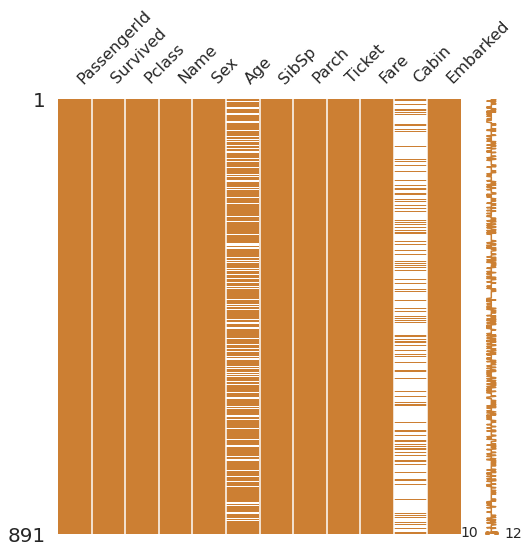

In [26]:
msno.matrix(df = df_train.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

#iloc = index location (행, 열 전부다 !)
#figsize = 그래프 크기
# 색 조절 RGB 조정

#이건 null 데이터 위치!

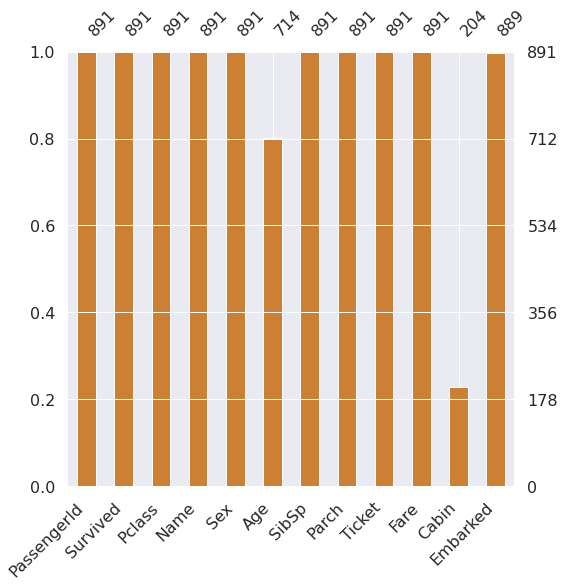

In [28]:
msno.bar(df = df_train.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

#이건 null 데이터를 제외한 값들의 수!

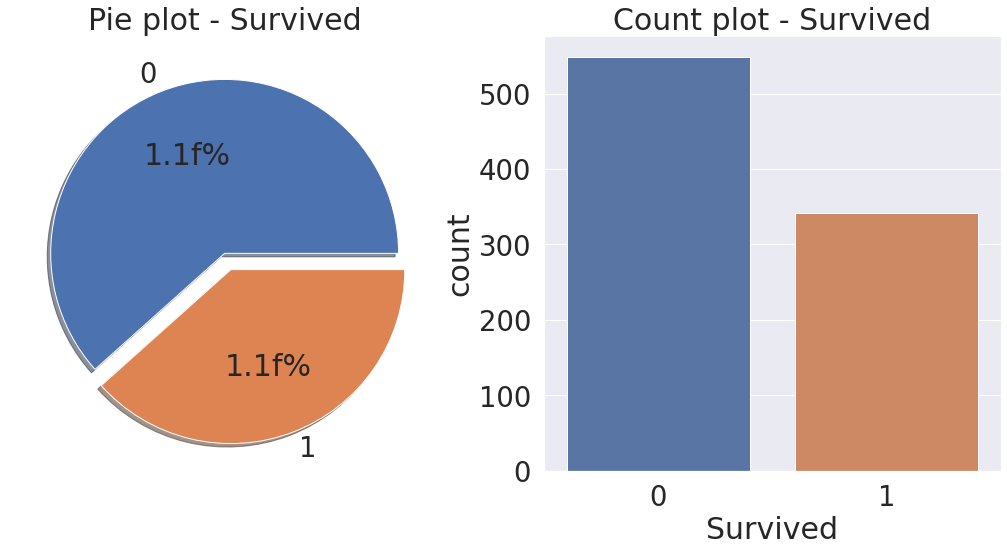

In [33]:
#Target Lable이 무엇이냐에 따라 모델의 생성 방향이 달라짐!

f, ax = plt.subplots(1, 2, figsize = (18,8)) #sub -> 도화지를 그리자
# 1 하나의 행에 2 두 개의 그림을 그리자
# 행 길이 18 열 길이 8

df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct='1.1f%%', ax = ax[0], shadow = True)
# value 는 각각의 수를 카운트 -> 전부 다 시리즈 = plot을 가짐
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel("")
sns.countplot("Survived", data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

# 2.1 Pclass

In [35]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

#filter 할 때 꼭 리스트 안에 넣어주기!
#as_index -> Pclass를 index로 두느냐? (groupby)

,Survived
Pclass,
1,216
2,184
3,491


In [39]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

#margin은 all

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [40]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


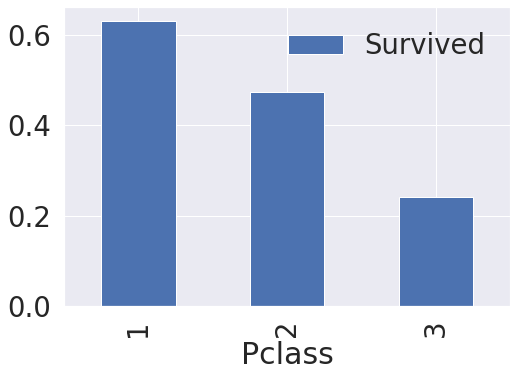

In [43]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar()

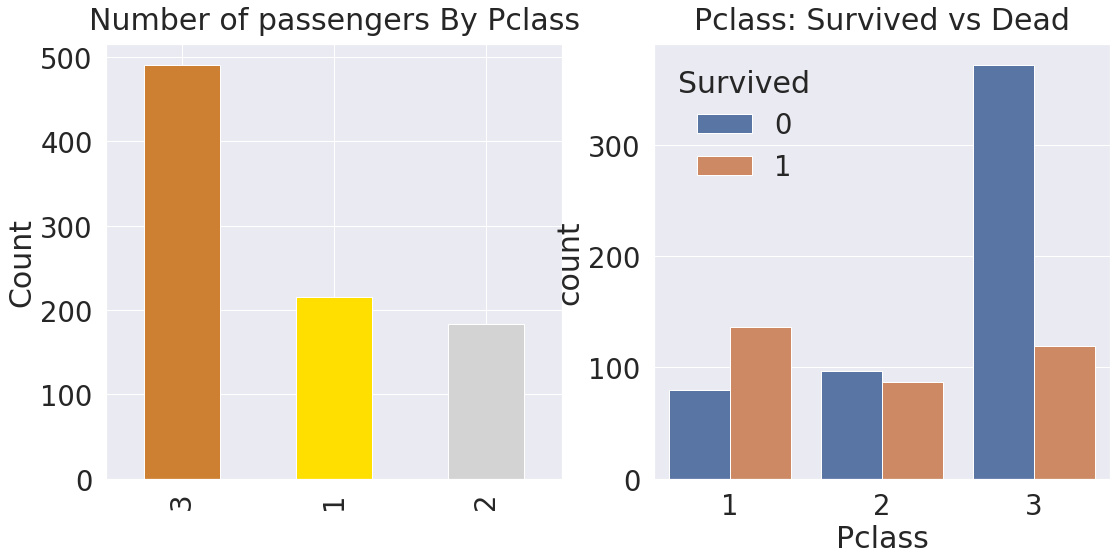

In [55]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax= ax[0])
ax[0].set_title('Number of passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = df_train, ax = ax[1])  
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()